In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History
import time

In [ ]:
start_time = time.time()



Se establece "low_memory=False", pues hay un problema dtype

In [ ]:
df = pd.read_csv('train.csv' , low_memory=False)

#df_2 = pd.read_csv('test.csv' , low_memory=False)
#Id = df_2['Id']
#percent = df_2.shape[0]/(df_1.shape[0]+df_2.shape[0])
#df_1 = df_1.drop(['Customers'],axis = 1)
#df_2 = df_2.drop(['Id'],axis = 1)
#df = pd.concat([df_1,df_2], axis = 0)
#print(df_1.shape[0])
#print(round(percent,5))
#print((1-round(percent,7)) * df.shape[0])

In [ ]:
store = pd.read_csv('store.csv')
print(store.shape)
store.head(5)

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


"on = 'Store'" establece que se buscarán los valores comunes en dicha columna, y no en parejas o tríos de características iguales.
"how='inner'" establece que se buscarán valores comunes.

In [ ]:
df_new = df.merge(store,on = ['Store'], how='inner')
print(df_new.shape)

(1017209, 18)


In [ ]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


## Extraemos los datos temporales de las fechas

In [ ]:
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.isocalendar().week

df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",
np.where(df_new["Month"].isin([6,7,8]),"Summer",
np.where(df_new["Month"].isin([9,10,11]),"Fall",
np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))

print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


## Predicción

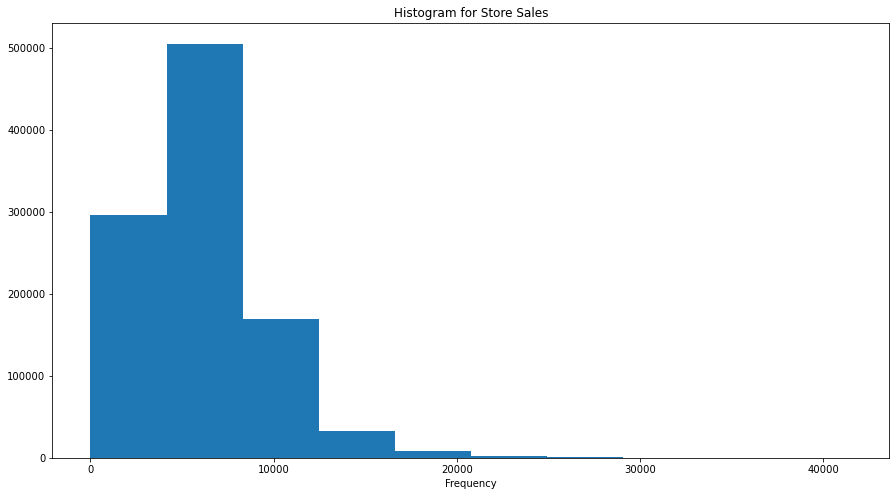

In [ ]:
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

Sacamos los nulos

In [ ]:
df_new.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Month                             0
Quarter                           0
Year                              0
Day                               0
Week                              0
Season                            0
dtype: int64

Lo pasamos a porcentaje para visualizarlo mejor

In [ ]:
df_new.isnull().sum()/df_new.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [ ]:
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

## Más visualización para entender los datos

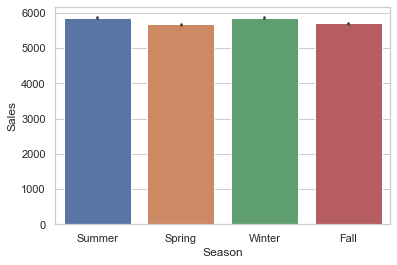

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Season", y="Sales", data=df_new)

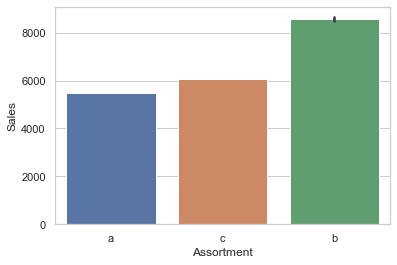

In [ ]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)

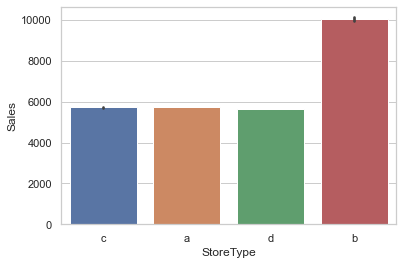

In [ ]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)

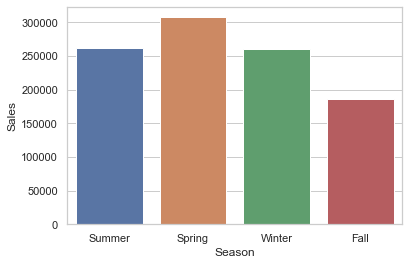

In [ ]:
ax = sns.barplot(x="Season", y="Sales", data=df_new,estimator=np.size)

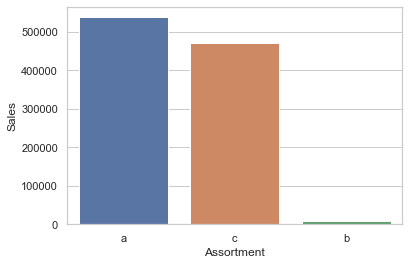

In [ ]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,estimator=np.size)

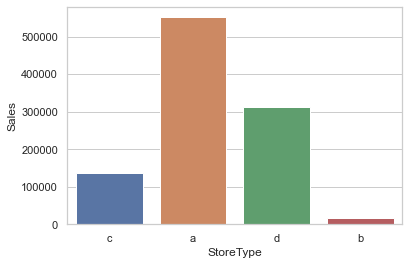

In [ ]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new,estimator=np.size)

## Pasamos a variable dummy de una forma distinta (Manual)

In [ ]:
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2",
"StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year",
"StoreType","Assortment","Season"]

In [ ]:
def create_ohe(df, col):
    
    le = LabelEncoder()
    a=le.fit_transform(df[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]

    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [ ]:
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)

In [ ]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [ ]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(temp,df_new[target],test_size = 0.2,random_state=2018)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

## Datos del dataset

In [ ]:
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

Average Sales : Sales    5773.099997
dtype: float64
MAE for Test Data: 2883.587604303127


## NN

### Rule 1: Start with small architectures

In the case of DNNs, it is always advised to
start with a single-layer network with around
100–300 neurons. Train the network and measure
performance using the defined metrics (while
defining the baseline score). If the results are not
encouraging, try adding one more layer with the
same number of neurons and repeating the process.

### Rule 2: When small architectures (with two layers) fail, increase the size

When the results from small networks are not
great, you need to increase the number of neurons
in layers by three to five times (i.e., around 1,000
neurons in each layer). Also, increase regularization to 0.3, 0.4,
or 0.5 for both layers and repeat the process for
training and performance measurement.

### Rule 3: When larger networks with two layers fail, go deeper

Try increasing the depth of the network with more
and more layers while maintaining regularization with
dropout layers (if required) after each dense (or your
selected layer) with a dropout rate between 0.2 and 0.5.

### Rule 4: When larger and deeper networks also fail, go even larger and even deeper

In case large networks with ~1000 neurons and five
or six layers also don’t give the desired performance,
try increasing the width and depth of the network.
Try adding layers with 8,000–10,000 neurons per
layer and a dropout of 0.6 to 0.8.

### Rule 5: When everything fails, revisit the data

If all the aforementioned rules fail, revisit the
data for improved feature engineering and
normalization, and then you will need to try other
ML alternatives.

In [ ]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_absolute_error",metrics=["mean_absolute_error"])
model.fit(x_train.values,y_train.values, validation_data=(x_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 5s 396us/step - loss: 961.1186 - mean_absolute_error: 961.1186 - val_loss: 860.9684 - val_mean_absolute_error: 860.9684
Epoch 2/10
11444/11444 [==============================] - 4s 377us/step - loss: 795.7559 - mean_absolute_error: 795.7559 - val_loss: 754.7706 - val_mean_absolute_error: 754.7706
Epoch 3/10
11444/11444 [==============================] - 4s 370us/step - loss: 740.3012 - mean_absolute_error: 740.3012 - val_loss: 769.4826 - val_mean_absolute_error: 769.4826
Epoch 4/10
11444/11444 [==============================] - 4s 372us/step - loss: 721.8868 - mean_absolute_error: 721.8868 - val_loss: 709.6592 - val_mean_absolute_error: 709.6592
Epoch 5/10
11444/11444 [==============================] - 4s 371us/step - loss: 712.3972 - mean_absolute_error: 712.3972 - val_loss: 706.5714 - val_mean_absolute_error: 706.5714
Epoch 6/10
11444/11444 [==============================] - 4s 391us/step - loss: 706.2375 - mean_absolute_error

In [ ]:
result = model.evaluate(x_test.values,y_test.values)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 3s 494us/step - loss: 676.7065 - mean_absolute_error: 676.7065
Metric  loss : 676.71
Metric  mean_absolute_error : 676.71


### Improve Model (add layers)

In [ ]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/10
11444/11444 [==============================] - 7s 578us/step - loss: 1730599.2500 - mean_absolute_error: 848.6553 - val_loss: 1226346.1250 - val_mean_absolute_error: 748.8177
Epoch 2/10
11444/11444 [==============================] - 6s 565us/step - loss: 1142727.0000 - mean_absolute_error: 717.3476 - val_loss: 1104444.0000 - val_mean_absolute_error: 717.0127
Epoch 3/10
11444/11444 [==============================] - 6s 554us/step - loss: 1090533.1250 - mean_absolute_error: 701.5511 - val_loss: 996292.0625 - val_mean_absolute_error: 677.9256
Epoch 4/10
11444/11444 [==============================] - 6s 553us/step - loss: 1056826.1250 - mean_absolute_error: 690.8472 - val_loss: 1040928.6875 - val_mean_absolute_error: 691.2471
Epoch 5/10
11444/11444 [==============================] - 6s 557us/step - loss: 1033628.0625 - mean_absolute_error: 683.4324 - val_loss: 1020236.2500 - val_mean_absolute_error: 688.2455
Epoch 6/10
11444/11444 [==============================] - 6s 556us/step

### More Improve Model (add epochs)

In [ ]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64).result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 2s 365us/step - loss: 48186952.0000 - mean_absolute_error: 5786.9692
Epoch 1/15
11444/11444 [==============================] - 8s 733us/step - loss: 1683182.3750 - mean_absolute_error: 846.3138 - val_loss: 1104687.1250 - val_mean_absolute_error: 714.8472
Epoch 2/15
11444/11444 [==============================] - 9s 784us/step - loss: 1181532.3750 - mean_absolute_error: 726.8267 - val_loss: 1130299.2500 - val_mean_absolute_error: 736.3859
Epoch 3/15
11444/11444 [==============================] - 9s 765us/step - loss: 1107073.8750 - mean_absolute_error: 704.4227 - val_loss: 1254839.1250 - val_mean_absolute_error: 738.8007
Epoch 4/15
11444/11444 [==============================] - 8s 721us/step - loss: 1063683.6250 - mean_absolute_error: 690.5197 - val_loss: 995846.8125 - val_mean_absolute_error: 667.1672
Epoch 5/15
11444/11444 [==============================] - 9s 794us/step - loss: 1036072.1875 - mean_absolute_error: 682.6133 - val_loss: 941849

### More More Improve Model (add neurons)

In [ ]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",
    str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 9s 748us/step - loss: 1699883.3750 - mean_absolute_error: 848.5432 - val_loss: 1274952.6250 - val_mean_absolute_error: 753.5364
Epoch 2/15
11444/11444 [==============================] - 8s 740us/step - loss: 1157892.6250 - mean_absolute_error: 726.4339 - val_loss: 1246858.3750 - val_mean_absolute_error: 733.8165
Epoch 3/15
11444/11444 [==============================] - 8s 694us/step - loss: 1086869.7500 - mean_absolute_error: 701.9226 - val_loss: 996254.0000 - val_mean_absolute_error: 673.5339
Epoch 4/15
11444/11444 [==============================] - 8s 685us/step - loss: 1048456.8750 - mean_absolute_error: 688.9476 - val_loss: 1031146.1875 - val_mean_absolute_error: 694.5947
Epoch 5/15
11444/11444 [==============================] - 8s 675us/step - loss: 1029791.7500 - mean_absolute_error: 682.6410 - val_loss: 1039524.6250 - val_mean_absolute_error: 683.5433
Epoch 6/15
11444/11444 [==============================] - 8s 693us/step

#### Let us now try deeper models for the same architecture. Additionally, we add a new optional configuration to the model to record the history of various metrics during the training process. This can be done by adding the callbacks parameter

In [ ]:
history = History()

model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64,callbacks=[history])

result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 18s 2ms/step - loss: 1645673.0000 - mean_absolute_error: 841.8300 - val_loss: 1257902.2500 - val_mean_absolute_error: 729.9356
Epoch 2/15
11444/11444 [==============================] - 21s 2ms/step - loss: 1183580.2500 - mean_absolute_error: 728.8044 - val_loss: 1017998.3125 - val_mean_absolute_error: 686.4440
Epoch 3/15
11444/11444 [==============================] - 21s 2ms/step - loss: 1106133.3750 - mean_absolute_error: 704.2567 - val_loss: 1032089.6250 - val_mean_absolute_error: 689.7532
Epoch 4/15
11444/11444 [==============================] - 21s 2ms/step - loss: 1067089.7500 - mean_absolute_error: 691.5518 - val_loss: 1000440.0625 - val_mean_absolute_error: 689.6218
Epoch 5/15
11444/11444 [==============================] - 21s 2ms/step - loss: 1032345.6875 - mean_absolute_error: 680.9220 - val_loss: 1116507.0000 - val_mean_absolute_error: 725.3052
Epoch 6/15
11444/11444 [==============================] - 21s 2ms/step - lo

### Plot

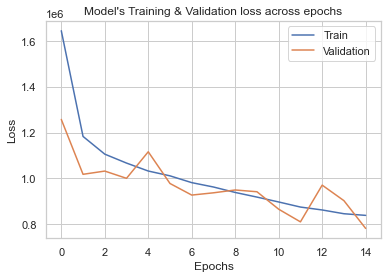

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Checking

In [ ]:
#Aquí se añade una columna, ['nombre'], por tanto ahora se tiene las columnas Sales (de antes) y Prediction
y_test["Prediction"] = model.predict(x_test)

#Aquí se hace un rename de las existentes, .columns, por tanto ahora se tiene las columnas Actual Sales y Predicted Sales
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))

        Actual Sales  Predicted Sales
115563             0         1.621428
832654             0         1.621428
769112          2933      3306.596680
350588          8602      7844.391113
141556          6975      6798.960938
84435           9239      8900.984375
53018              0         1.621428
262419             0         1.621428
702267          5885      5451.757324
981431             0         1.621428
MSE : 781031.8012541613
MAE : 593.3813909641311


In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 748.2278015613556 seconds ---
